In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r'D:\globalterrorismdb_0718dist.csv',encoding='charmap')
df

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
df=df.loc[:,['country_txt','region_txt','iyear','imonth','iday','latitude','longitude']]

In [5]:
df['accident_date'] = df.iday.astype('str')+'-'+df.imonth.astype('str')+'-'+df.iyear.astype('str')
df.head()

,country_txt,region_txt,iyear,imonth,iday,latitude,longitude,accident_date
0,Dominican Republic,Central America & Caribbean,1970,7,2,18.456792,-69.951164,2-7-1970
1,Mexico,North America,1970,0,0,19.371887,-99.086624,0-0-1970
2,Philippines,Southeast Asia,1970,1,0,15.478598,120.599741,0-1-1970
3,Greece,Western Europe,1970,1,0,37.997490,23.762728,0-1-1970
4,Japan,East Asia,1970,1,0,33.580412,130.396361,0-1-1970


In [6]:
df=df.sort_values(by=['country_txt','region_txt','iyear','imonth','iday','latitude','longitude'])
df

,country_txt,region_txt,iyear,imonth,iday,latitude,longitude,accident_date
1863,Afghanistan,South Asia,1973,5,1,34.516895,69.147011,1-5-1973
7627,Afghanistan,South Asia,1979,2,14,34.516895,69.147011,14-2-1979
9156,Afghanistan,South Asia,1979,8,27,33.542622,68.415329,27-8-1979
9218,Afghanistan,South Asia,1979,9,9,34.346722,62.197315,9-9-1979
31132,Afghanistan,South Asia,1987,5,31,NaN,NaN,31-5-1987
...,...,...,...,...,...,...,...,...
125189,Zimbabwe,Sub-Saharan Africa,2013,12,29,-20.172190,28.581160,29-12-2013
127886,Zimbabwe,Sub-Saharan Africa,2014,2,25,-17.829560,31.053909,25-2-2014
176881,Zimbabwe,Sub-Saharan Africa,2017,7,12,-17.832667,30.933316,12-7-2017
177097,Zimbabwe,Sub-Saharan Africa,2017,7,19,-17.864021,31.029813,19-7-2017


In [7]:
dffamcountries=df.country_txt.value_counts()
dffamcountries

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Antigua and Barbuda        1
New Hebrides               1
St. Lucia                  1
South Vietnam              1
North Korea                1
Name: country_txt, Length: 205, dtype: int64

In [8]:
dffamcountries.describe()

count      205.000000
mean       886.297561
std       2582.329894
min          1.000000
25%         13.000000
50%         66.000000
75%        363.000000
max      24636.000000
Name: country_txt, dtype: float64

In [13]:
a,b=dffamcountries.quantile([0.25,0.75])[[0.25,0.75]]                                      

In [14]:
countries=dffamcountries[(dffamcountries>a)*(dffamcountries<b)]
countries

Cameroon      332
Honduras      323
Bolivia       314
Ireland       307
Venezuela     293
             ... 
Fiji           17
Latvia         17
Estonia        16
Luxembourg     16
Swaziland      16
Name: country_txt, Length: 101, dtype: int64

In [15]:
dfwithquantile=df[df.country_txt.apply(lambda x: x in countries)]
dfwithquantile

,country_txt,region_txt,iyear,imonth,iday,latitude,longitude,accident_date
13599,Albania,Eastern Europe,1981,5,23,41.327500,19.818889,23-5-1981
43171,Albania,Eastern Europe,1990,7,3,41.327500,19.818889,3-7-1990
48028,Albania,Eastern Europe,1991,9,8,42.357222,20.073056,8-9-1991
50654,Albania,Eastern Europe,1992,3,20,42.067500,19.513056,20-3-1992
50666,Albania,Eastern Europe,1992,3,21,41.327500,19.818889,21-3-1992
...,...,...,...,...,...,...,...,...
125189,Zimbabwe,Sub-Saharan Africa,2013,12,29,-20.172190,28.581160,29-12-2013
127886,Zimbabwe,Sub-Saharan Africa,2014,2,25,-17.829560,31.053909,25-2-2014
176881,Zimbabwe,Sub-Saharan Africa,2017,7,12,-17.832667,30.933316,12-7-2017
177097,Zimbabwe,Sub-Saharan Africa,2017,7,19,-17.864021,31.029813,19-7-2017


In [23]:
dfmonthstat=pd.DataFrame(dfwithquantile.imonth.value_counts()).reset_index()
dfmonthstat.rename(columns={'index': 'monthnumber', 'imonth': 'counter'},inplace=True)
dfmonthstat.sort_values(by=['monthnumber'])
dfmonthstat

,monthnumber,counter
0,7,897
1,10,889
2,11,852
3,3,846
4,8,830
5,9,813
6,5,812
7,6,783
8,4,783
9,1,760


In [22]:
dfnorm=dfmonthstat.apply(lambda x: (x-x.min())/(x.max()-x.min()))
dfnorm

,monthnumber,counter
0,0.583333,1.000000
1,0.833333,0.991061
2,0.916667,0.949721
3,0.250000,0.943017
4,0.666667,0.925140
5,0.750000,0.906145
6,0.416667,0.905028
7,0.500000,0.872626
8,0.333333,0.872626
9,0.083333,0.846927


<AxesSubplot:ylabel='Frequency'>

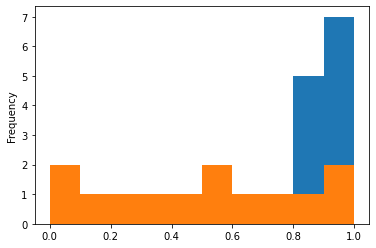

In [13]:
dfnorm.counter.plot.hist()
dfnorm.monthnumber.plot.hist()

<AxesSubplot:ylabel='Density'>

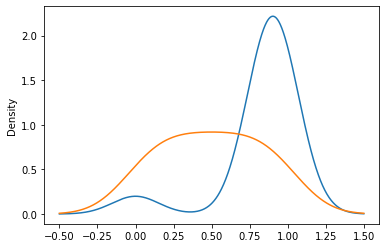

In [14]:
dfnorm.counter.plot(kind='kde')
dfnorm.monthnumber.plot(kind='kde')

In [15]:
import numpy as np
import matplotlib.pyplot as plt

(array([  5.,  35., 127., 193., 257., 211., 120.,  36.,  14.,   2.]),
 array([-2.95601504, -2.30787559, -1.65973613, -1.01159667, -0.36345722,
         0.28468224,  0.9328217 ,  1.58096115,  2.22910061,  2.87724007,
         3.52537952]),
 <BarContainer object of 10 artists>)

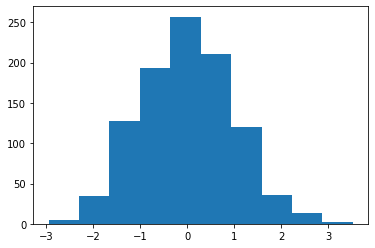

In [16]:
plt.hist(np.random.normal(size=1000))

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [18]:
X=np.array(dfnorm.monthnumber).reshape(-1,1)
Y=np.array(dfnorm.counter)


In [19]:
model=LinearRegression().fit(X,Y)

In [20]:
y_pred=model.predict(X)

In [21]:
y_pred

array([0.8666462 , 0.96757321, 1.00121554, 0.73207686, 0.90028854,
       0.93393087, 0.79936153, 0.83300387, 0.7657192 , 0.66479219,
       0.69843453, 1.03485788, 0.63114986])

In [22]:
Y

array([1.        , 0.99106145, 0.94972067, 0.94301676, 0.92513966,
       0.90614525, 0.90502793, 0.8726257 , 0.8726257 , 0.84692737,
       0.81452514, 0.80223464, 0.        ])

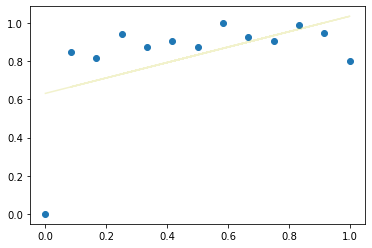

In [23]:
plt.scatter(X,Y)
plt.plot(X,y_pred,c='y',alpha=0.2)